In [94]:
%matplotlib inline

In [95]:
import pandas as pd 
from sklearn.model_selection import train_test_split
dataset = pd.read_csv('C:/Users/T480/Downloads/health_readmissions.csv')
dataset.head()
o_df = dataset.copy()


In [96]:
dataset['insurance_status'].fillna('None',inplace=True)

C:\Users\T480\AppData\Local\Temp\ipykernel_6252\2696364031.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['insurance_status'].fillna('None',inplace=True)


In [97]:
from ydata_profiling import ProfileReport
profile = ProfileReport(dataset, title='Data_Profile')

#Generate the profile report
#profile.to_file('Profile_report.html')

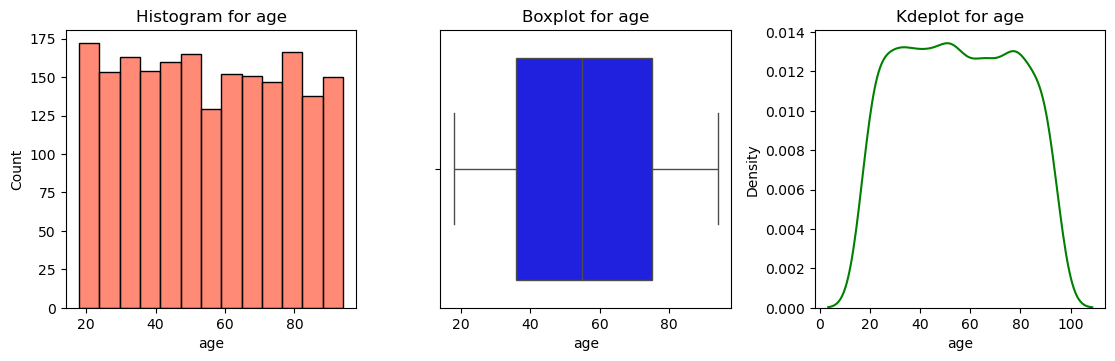

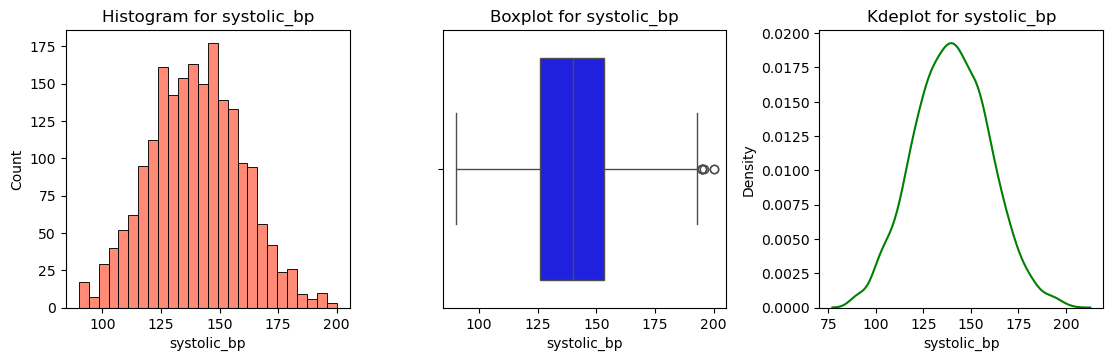

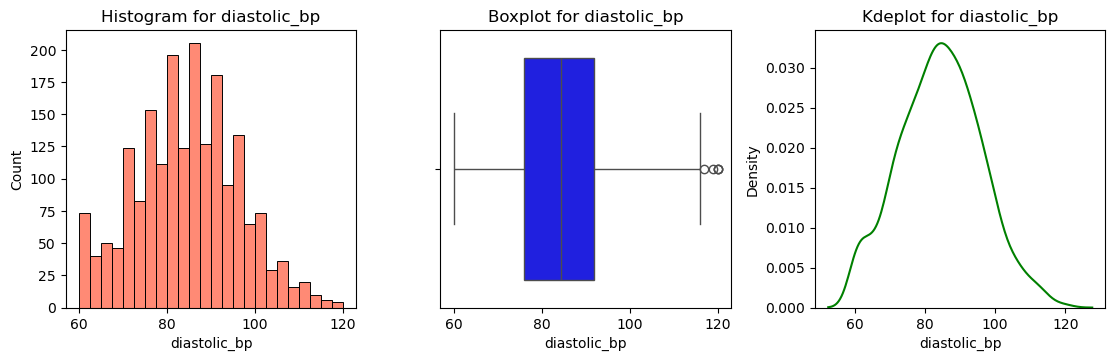

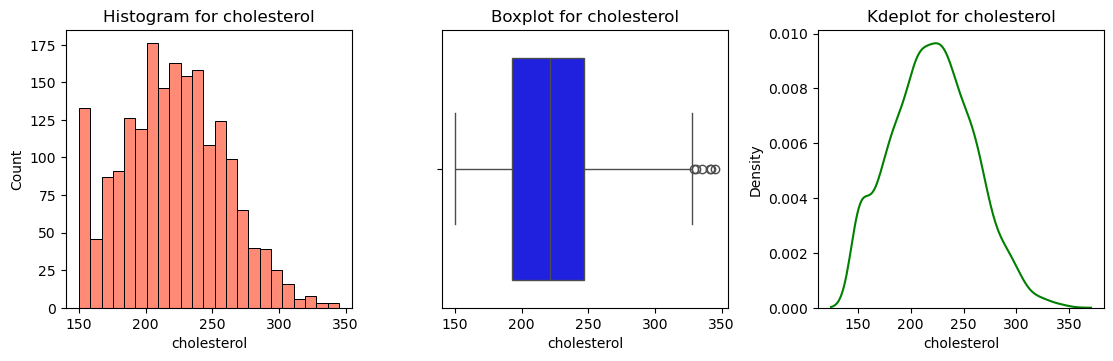

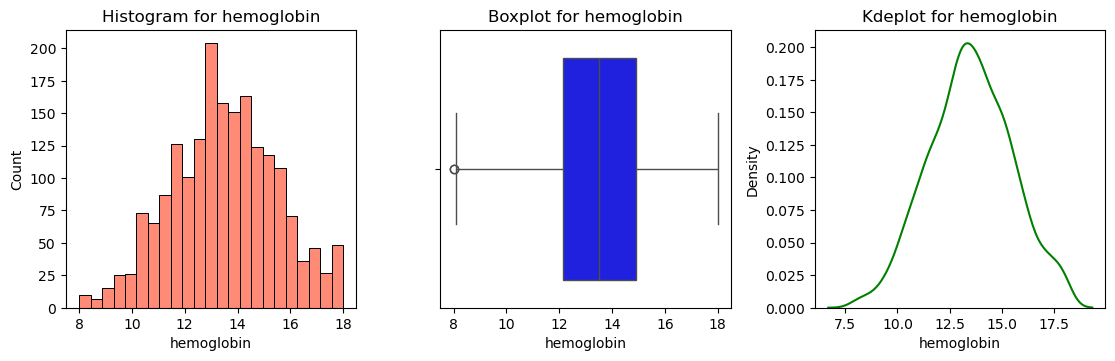

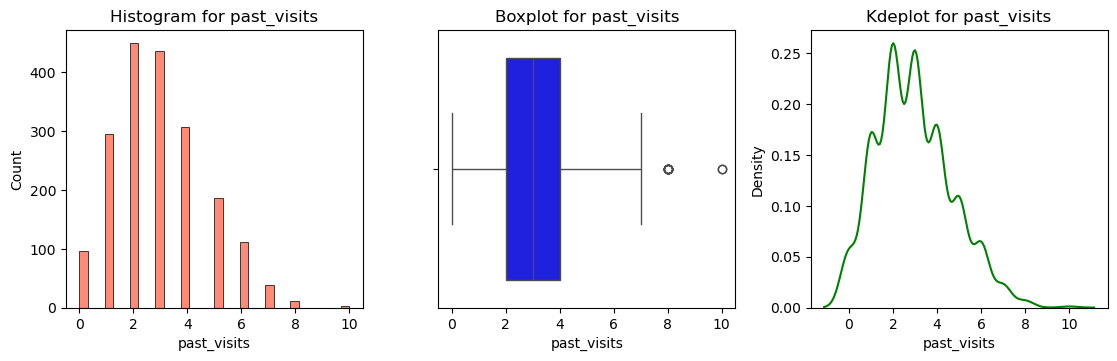

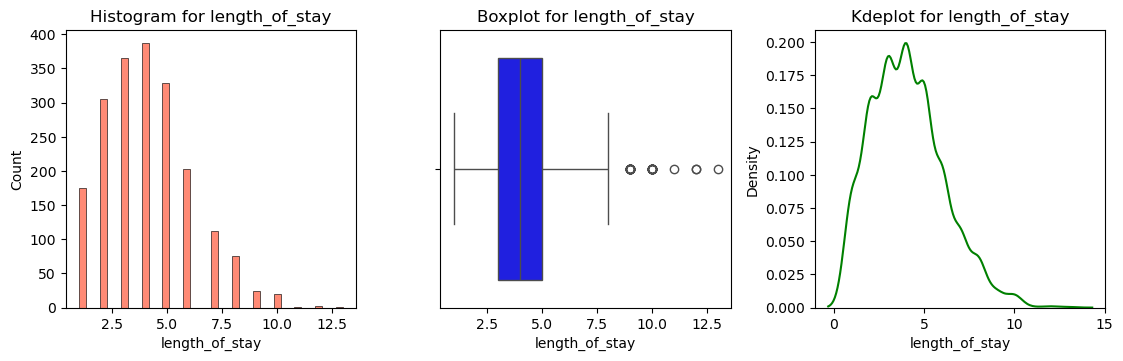

In [98]:
#EDA for original dataset -- o_df
import seaborn as sns 
import matplotlib.pyplot as plt

num = ['age', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'hemoglobin', 'past_visits', 'length_of_stay']
cat = ['sex', 'residence_type','insurance_status']

#Disribution of numerical columns
for col in num:
    plt.figure(figsize=(15,10))
    plt.subplot(3,4,1)
    sns.histplot(data=o_df,x=col, color='tomato')
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.tight_layout()

    plt.subplot(3,4,2)
    sns.boxplot(data=o_df,x=col, color='blue')
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.tight_layout()

    plt.subplot(3,4,3)
    sns.kdeplot(data=o_df, x=col, color='green')
    plt.title(f'Kdeplot for {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

C:\Users\T480\AppData\Local\Temp\ipykernel_6252\1766623723.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset,x=col,palette='tab10')


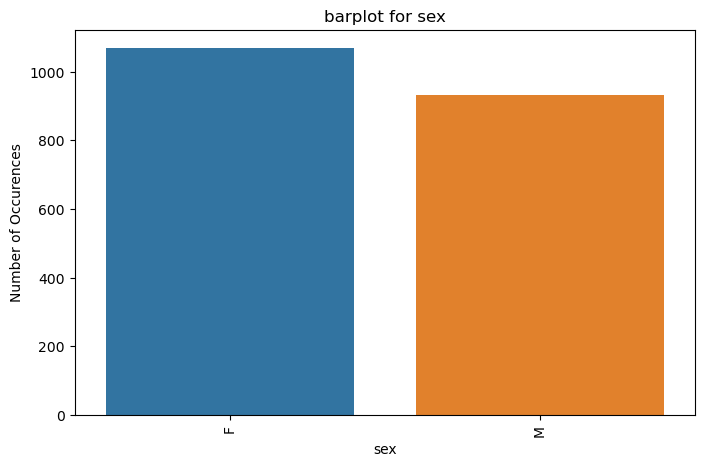

C:\Users\T480\AppData\Local\Temp\ipykernel_6252\1766623723.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset,x=col,palette='tab10')


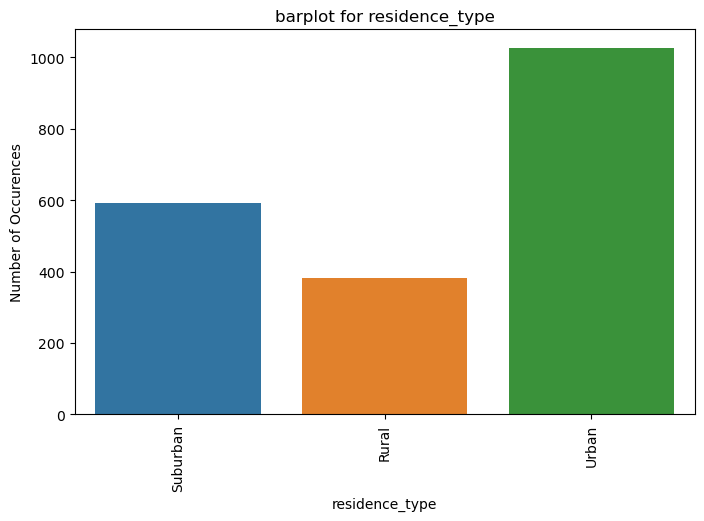

C:\Users\T480\AppData\Local\Temp\ipykernel_6252\1766623723.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset,x=col,palette='tab10')


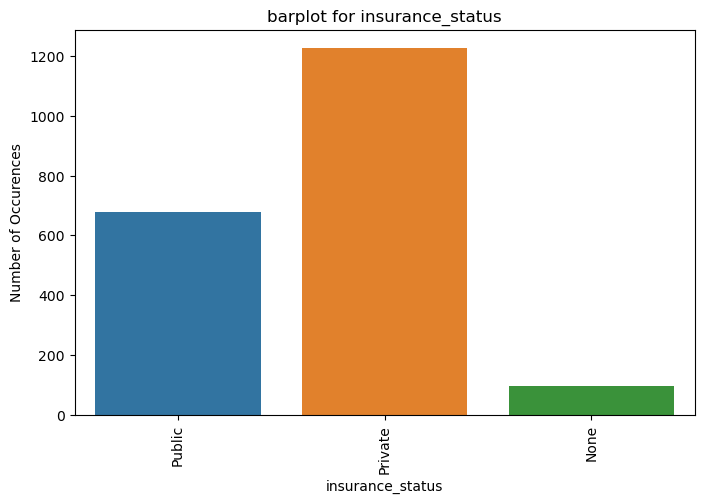

In [99]:
for col in cat:
    plt.figure(figsize=(8,5))
    sns.countplot(data=dataset,x=col,palette='tab10')
    plt.title(f'barplot for {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Occurences')
    plt.xticks(rotation=90)
    plt.show()

In [100]:
f_chol_avg = round(dataset.loc[dataset['sex'] == 'F', 'cholesterol'].median())
m_chol_avg = round(dataset.loc[dataset['sex'] == 'M', 'cholesterol'].median())
f_hem_avg = round(dataset.loc[dataset['sex'] == 'F', 'hemoglobin'].median(),1)
m_hem_avg = round(dataset.loc[dataset['sex'] == 'M', 'hemoglobin'].median(),1)


In [101]:
dataset.loc[(dataset['sex'] == 'F') & (dataset['cholesterol'].isna()), 'cholesterol'] = f_chol_avg

dataset.loc[(dataset['sex'] == 'M') & (dataset['cholesterol'].isna()), 'cholesterol'] = m_chol_avg

In [102]:
dataset.loc[(dataset['sex'] == 'F') & (dataset['hemoglobin'].isna()), 'hemoglobin'] = f_hem_avg

dataset.loc[(dataset['sex'] == 'M') & (dataset['hemoglobin'].isna()), 'hemoglobin'] = m_hem_avg

In [103]:
median_past_visits = round(dataset['past_visits'].median())
dataset['past_visits'] = dataset['past_visits'].fillna(median_past_visits)

In [104]:
dataset.isna().sum()

age                         0
sex                         0
residence_type              0
systolic_bp                 0
diastolic_bp                0
cholesterol                 0
hemoglobin                  0
past_visits                 0
length_of_stay              0
insurance_status            0
readmitted_within_30days    0
dtype: int64

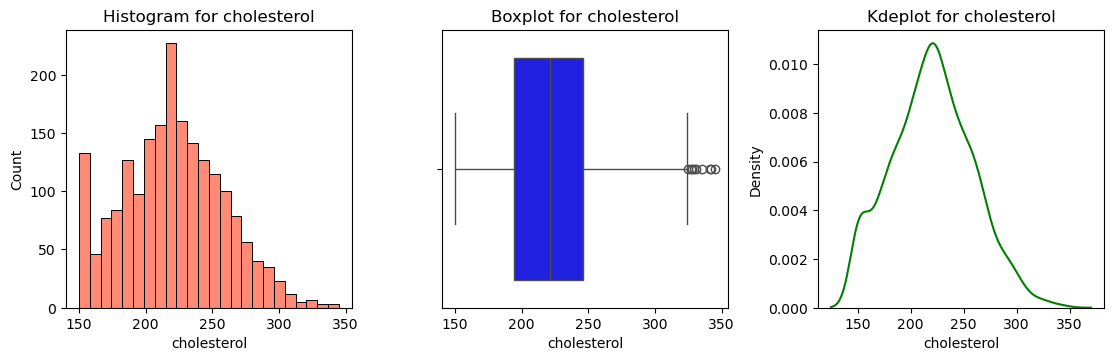

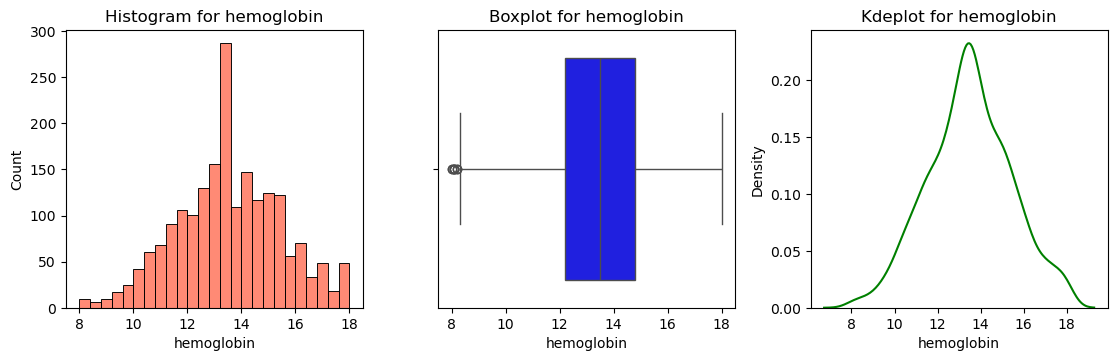

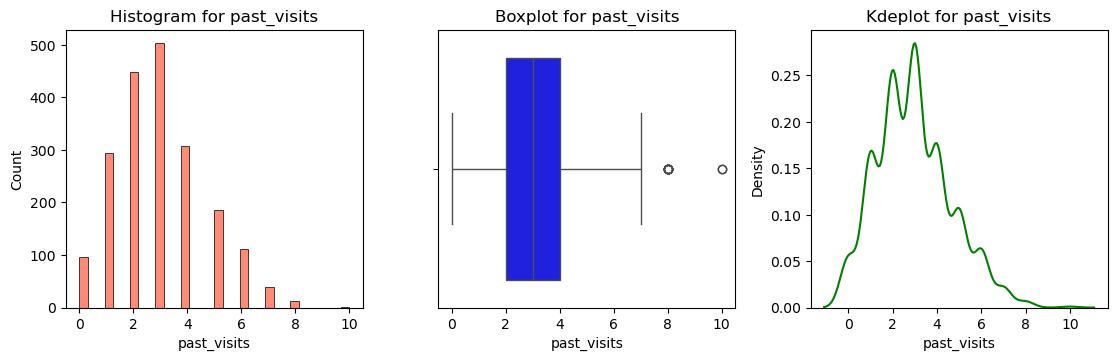

In [105]:
missing_val = ['cholesterol','hemoglobin','past_visits']

for col in missing_val:
    plt.figure(figsize=(15,10))
    plt.subplot(3,4,1)
    sns.histplot(data=dataset,x=col, color='tomato')
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.tight_layout()

    plt.subplot(3,4,2)
    sns.boxplot(data=dataset,x=col, color='blue')
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.tight_layout()

    plt.subplot(3,4,3)
    sns.kdeplot(data=dataset, x=col, color='green')
    plt.title(f'Kdeplot for {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [106]:
new_profile = ProfileReport(dataset, title='Data_Profile')

#Generate the profile report
#new_profile.to_file('Profile_report_new.html')

In [107]:
data_copy = dataset.copy()
data_copy.columns

Index(['age', 'sex', 'residence_type', 'systolic_bp', 'diastolic_bp',
       'cholesterol', 'hemoglobin', 'past_visits', 'length_of_stay',
       'insurance_status', 'readmitted_within_30days'],
      dtype='object')

QUESTION 1

In [108]:
#Question 1 (A) = Binning for Chi-Square
bio_categories = ['systolic_bp','diastolic_bp','cholesterol','hemoglobin']
for col in bio_categories:
    data_copy[f'{col}_bin'] = pd.qcut(data_copy[col],q=3,labels=['Low','Medium','High'])
data_copy['age_bin'] = pd.qcut(data_copy['age'],q=3,labels=['Young Adults','Middle Aged','Senior'])
data_copy['LOS_bin'] = pd.qcut(data_copy['length_of_stay'],q=3,labels=['Short','Medium','Long'])
data_copy['past_visits_bin'] = pd.qcut(data_copy['past_visits'],q=3,labels=['Low','Medium','High'])

data_copy.head()


,age,sex,residence_type,systolic_bp,diastolic_bp,cholesterol,hemoglobin,past_visits,length_of_stay,insurance_status,readmitted_within_30days,systolic_bp_bin,diastolic_bp_bin,cholesterol_bin,hemoglobin_bin,age_bin,LOS_bin,past_visits_bin
0,69,F,Suburban,107,72,171.0,15.9,5.0,7,Public,0,Low,Low,Low,High,Senior,Long,High
1,32,F,Suburban,131,92,235.0,12.7,5.0,7,Private,0,Low,High,Medium,Low,Young Adults,Long,High
2,89,M,Suburban,150,84,150.0,13.0,0.0,5,Private,0,High,Medium,Low,Medium,Senior,Medium,Low
3,78,M,Rural,155,107,232.0,12.4,2.0,6,None,0,High,High,Medium,Low,Senior,Long,Low
4,38,M,Urban,153,93,250.0,12.0,4.0,4,Private,0,High,High,High,Low,Young Adults,Medium,High


In [109]:
from scipy.stats import chi2_contingency
cat_features = ['systolic_bp_bin','diastolic_bp_bin','cholesterol_bin','hemoglobin_bin','age_bin','LOS_bin','past_visits_bin','sex',
                'insurance_status','residence_type']
results = [] 
for feature in cat_features:
    table = pd.crosstab(data_copy[feature], data_copy['readmitted_within_30days'])
    chi2, p_value, dof, expected = chi2_contingency(table)
    results.append({'Feature': feature,
                    'Chi-Square': chi2,
                    'p_value': p_value,
                    'Degree of Freedom': dof})

results_df = pd.DataFrame(results)

results_df.sort_values(by='p_value')

,Feature,Chi-Square,p_value,Degree of Freedom
4,age_bin,136.191309,2.669519e-30,2
0,systolic_bp_bin,96.095597,1.358646e-21,2
6,past_visits_bin,81.498886,2.007898e-18,2
5,LOS_bin,18.009662,1.228150e-04,2
2,cholesterol_bin,4.468485,1.070732e-01,2
1,diastolic_bp_bin,2.050337,3.587360e-01,2
8,insurance_status,1.793312,4.079315e-01,2
9,residence_type,1.607858,4.475670e-01,2
3,hemoglobin_bin,0.909835,6.345003e-01,2
7,sex,0.121324,7.276026e-01,1


In [110]:
#pip install mlxtend

In [111]:
# (B) - Forward Selection Wrapper Method 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS 


In [112]:
df_num = dataset[['age','systolic_bp','diastolic_bp','cholesterol','hemoglobin','past_visits','length_of_stay']]
df_cat = dataset[['sex','residence_type','insurance_status']]
target = dataset['readmitted_within_30days'] 

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_num)
df_num_scaled = pd.DataFrame(df_num_scaled, columns=df_num.columns)
df_num_scaled.info()
print("Numerical columns have been scaled.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2000 non-null   float64
 1   systolic_bp     2000 non-null   float64
 2   diastolic_bp    2000 non-null   float64
 3   cholesterol     2000 non-null   float64
 4   hemoglobin      2000 non-null   float64
 5   past_visits     2000 non-null   float64
 6   length_of_stay  2000 non-null   float64
dtypes: float64(7)
memory usage: 109.5 KB
Numerical columns have been scaled.


In [114]:
df_encoded = pd.get_dummies(df_cat,columns=['sex','residence_type','insurance_status'],dtype=int,drop_first=True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   sex_M                     2000 non-null   int32
 1   residence_type_Suburban   2000 non-null   int32
 2   residence_type_Urban      2000 non-null   int32
 3   insurance_status_Private  2000 non-null   int32
 4   insurance_status_Public   2000 non-null   int32
dtypes: int32(5)
memory usage: 39.2 KB


In [115]:
selection_wrapper_df = pd.concat([df_num_scaled, df_encoded], axis=1)
selection_wrapper_df.head()
X = selection_wrapper_df

In [116]:
lr_model = LogisticRegression(random_state=42,max_iter=100)
selection = SFS(lr_model, k_features='best', forward=True, scoring='accuracy', cv=2)

fit = selection.fit(selection_wrapper_df, target)
selected_features = list(selection.k_feature_names_)
 
print(selected_features)
print(selection.k_score_)

['age', 'systolic_bp', 'past_visits', 'sex_M', 'residence_type_Suburban', 'residence_type_Urban']
0.8935


In [117]:
rf_model = RandomForestClassifier(random_state=42)
rf_selection = SFS(rf_model, k_features='best', forward=True, scoring='accuracy', cv=2)

fit = rf_selection.fit(selection_wrapper_df, target)
rf_selected_features = list(rf_selection.k_feature_names_)
 
print(rf_selected_features)
print(rf_selection.k_score_)


['age', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'hemoglobin', 'past_visits', 'length_of_stay', 'sex_M', 'residence_type_Suburban', 'residence_type_Urban', 'insurance_status_Private', 'insurance_status_Public']
0.8835


QUESTION 2 - BUILD LOGISTIC REGRESSION AND RANDOM FOREST CLASSIFIER MODEL //
QUESTION 3  (A) 5 CROSS VALIDATION AND (B) ROC CURVE GRAPH

In [118]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [119]:
X = dataset.drop(columns=['readmitted_within_30days'])
y = dataset['readmitted_within_30days']

In [120]:
Logistic_Features = ['age', 'systolic_bp', 'past_visits', 'sex', 'residence_type'] 
Random_Features = ['age', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'hemoglobin', 'past_visits', 'length_of_stay', 'sex', 'residence_type', 'insurance_status']

In [121]:
#Split full dataset 
X_train_full,X_test_full,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train_lr = X_train_full[Logistic_Features]
X_test_lr = X_test_full[Logistic_Features]
lr_num = ['age', 'systolic_bp', 'past_visits']
lr_cat = ['sex', 'residence_type']

X_train_rf = X_train_full[Random_Features]
X_test_rf = X_test_full[Random_Features]
#rf_num = ['age', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'hemoglobin', 'past_visits', 'length_of_stay']
rf_cat = ['sex', 'residence_type', 'insurance_status']

In [122]:
#Preprocess datasets for both models  
lr_standardization = ColumnTransformer(
    transformers=[('lr_num',StandardScaler(),lr_num),('lr_cat',OneHotEncoder(drop='first'),lr_cat)])

X_train_lr_processed = lr_standardization.fit_transform(X_train_lr)

X_train_lr_processed = lr_standardization.fit_transform(X_train_lr)
X_test_lr_processed = lr_standardization.transform(X_test_lr)

rf_standardization = ColumnTransformer(
    transformers=[('rf_cat',OneHotEncoder(),rf_cat)],
    remainder='passthrough')

X_train_rf_processed = rf_standardization.fit_transform(X_train_rf)
X_test_rf_processed = rf_standardization.transform(X_test_rf)


In [123]:
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_lr_processed,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [124]:
#Evidence that model has been built and testing to see performance on seen data
from sklearn.metrics import confusion_matrix

log_cm = confusion_matrix(y_test,log_model.predict(X_test_lr_processed))
log_cm


array([[359,   6],
       [ 28,   7]], dtype=int64)

In [125]:
lr_pred = log_model.predict(X_test_lr_processed)
prob_lr = log_model.predict_proba(X_test_lr_processed)[:,1]
accuracy = accuracy_score(y_test, lr_pred)
precision = precision_score(y_test, lr_pred)
recall = recall_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)
roc_auc = roc_auc_score(y_test, prob_lr) 
lr_table = {'accuracy':accuracy,
          'precision':precision,
          'recall':recall,
          'f1':f1,
          'roc_auc':roc_auc}
lr_table

{'accuracy': 0.915,
 'precision': 0.5384615384615384,
 'recall': 0.2,
 'f1': 0.2916666666666667,
 'roc_auc': 0.7785518590998044}

In [126]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_rf_processed,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [127]:
rf_cm = confusion_matrix(y_test,rf_model.predict(X_test_rf_processed))
rf_cm

array([[363,   2],
       [ 30,   5]], dtype=int64)

In [128]:
rf_pred = rf_model.predict(X_test_rf_processed)
prob_rf = rf_model.predict_proba(X_test_rf_processed)[:,1]
accuracy = accuracy_score(y_test, rf_pred)
precision = precision_score(y_test, rf_pred)
recall = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
roc_auc = roc_auc_score(y_test, prob_rf) 
rf_table = {'accuracy':accuracy,
          'precision':precision,
          'recall':recall,
          'f1':f1,
          'roc_auc':roc_auc}
rf_table

{'accuracy': 0.92,
 'precision': 0.7142857142857143,
 'recall': 0.14285714285714285,
 'f1': 0.23809523809523808,
 'roc_auc': 0.7239138943248532}

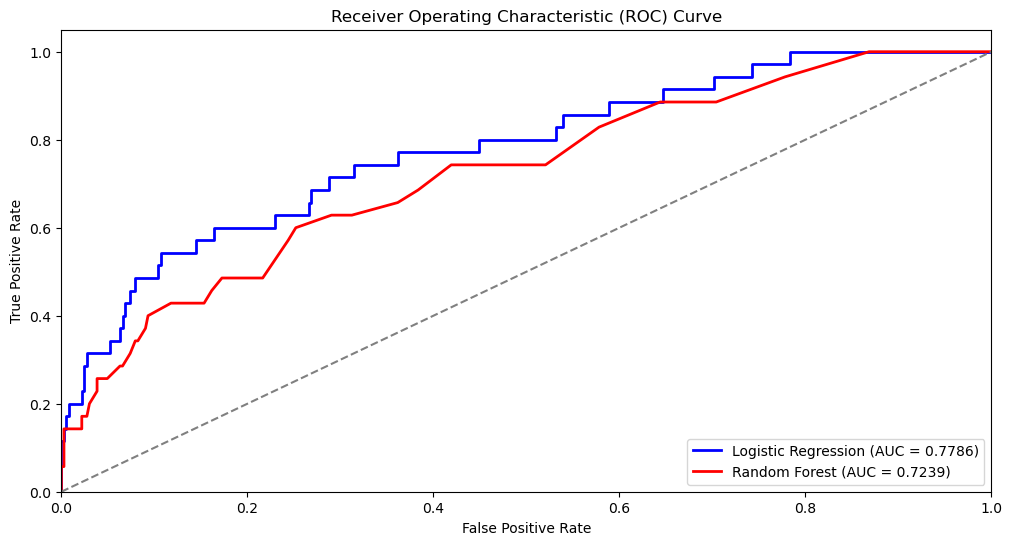

In [129]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Get predicted probabilities for both models
prob_lr = log_model.predict_proba(X_test_lr_processed)[:, 1]
prob_rf = rf_model.predict_proba(X_test_rf_processed)[:, 1]

# Calculate the ROC curve points for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, prob_lr)
roc_auc_lr = roc_auc_score(y_test, prob_lr)

# Calculate the ROC curve points for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, prob_rf)
roc_auc_rf = roc_auc_score(y_test, prob_rf)

# Plot the ROC curves
plt.figure(figsize=(12, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') # Plot the random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

QUESTION 3 (C) MCNEMAR'S TEST

In [130]:
lr_correct = (lr_pred == y_test)
rf_correct = (rf_pred == y_test)

In [131]:
import numpy as np

a = np.sum((lr_correct == True) & (rf_correct == True)) #Where both models predicted correctly
b = np.sum((lr_correct == True) & (rf_correct == False)) #This detects where Logistic regression model is correct and Random Classifier incorrect - the number of times
c = np.sum((rf_correct == True) & (lr_correct == False)) #This detects where Random Classifier is correct and Logistic regression model is incorrect - the number of times 
d = np.sum((lr_correct == False) & (rf_correct == False)) #Where both models predicted incorrectly 

contingency_table = [[a,0],[b,0],[c,0],[d,0]]

In [132]:
from statsmodels.stats.contingency_tables import mcnemar

result = mcnemar(contingency_table, exact=False)

In [133]:
print(result.pvalue)

0.07363827012030258


In [134]:
contingency_table

[[361, 0], [5, 0], [7, 0], [27, 0]]